In [19]:
import json
import glob
import os
import calendar

In [20]:
import numpy as np 
import pandas as pd                  # for DataFrames
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [21]:
from sklearn import preprocessing
import scipy.fftpack                 # discrete Fourier transforms
from scipy import signal
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import chirp, peak_widths

In [22]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from datetime import datetime


In [23]:
import re

In [24]:
# Directory path
day = "GalaxtWatchTests/02-17-2024"
directory_path = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/InternalStudy/02-22-24/M1"


In [25]:
directory_path

'/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/InternalStudy/02-22-24/M1'

In [26]:
def filtering_plots(df):
    # Setting fonts and styles
    title_font = 12
    axis_font = 40
    font = {'family': 'Sans'}
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=50)
    plt.rc('ytick', labelsize=50)
    # Create a 2x3 grid of subplots (2 rows, 3 columns)
    fig, axs = plt.subplots(2, 3, figsize=(30, 20))  # Adjust figsize as needed
    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the space between the plots

    # Plotting Accelerometer data
    axs[0, 0].plot(df['X'], color="#171ad1", linestyle='--', label="Raw Data")
    # axs[0, 0].plot(df["Filtered_Accel_X"], color="#478F96", linewidth=4, label="Moving Average")
    axs[0, 0].set_title('Acceleration X', fontsize=title_font)
    axs[0, 0].legend(loc='upper right')

    axs[0, 1].plot(df['Y'], color="#171ad1", linestyle='--', label="Raw Data")
    # axs[0, 1].plot(df["Filtered_Accel_Y"], color="#478F96", linewidth=4, label="Moving Average")
    axs[0, 1].set_title('Acceleration Y', fontsize=title_font)
    axs[0, 1].legend(loc='upper right')

    axs[0, 2].plot(df['Z'], color="#171ad1", linestyle='--', label="Raw Data")
    # axs[0, 2].plot(df["Filtered_Accel_Z"], color="#478F96", linewidth=4, label="Moving Average")
    axs[0, 2].set_title('Acceleration Z', fontsize=title_font)
    axs[0, 2].legend(loc='upper right')

    # # Plotting Gyroscope data
    axs[1, 0].plot(df['Z'], color="#171ad1", linestyle='--', label="Raw Data")
    # # axs[1, 0].plot(df["Filtered_Gryo_X"], color="#478F96", linewidth=4, label="Moving Average")
    # axs[1, 0].set_title('Gyroscope X', fontsize=title_font)
    # axs[1, 0].legend(loc='upper right')

    # axs[1, 1].plot(df[' Gyro_Y'], color="#171ad1", linestyle='--', label="Raw Data")
    # # axs[1, 1].plot(df["Filtered_Gryo_Y"], color="#478F96", linewidth=4, label="Moving Average")
    # axs[1, 1].set_title('Gyroscope Y', fontsize=title_font)
    # axs[1, 1].legend(loc='upper right')

    # axs[1, 2].plot(df[' Gyro_Z'], color="#171ad1", linestyle='--', label="Raw Data")
    # # axs[1, 2].plot(df["Filtered_Gryo_Z"], color="#478F96", linewidth=4, label="Moving Average")
    # axs[1, 2].set_title('Gyroscope Z', fontsize=title_font)
    # axs[1, 2].legend(loc='upper right')

    return plt

In [27]:
def average_sampling_rate(df):
    sr_dict = df["formatted_timestamp"].value_counts().to_dict()
    #print("sr_dict",sr_dict)
    # Step 1: Calculate the sum of all values
    total_sum = sum(sr_dict.values())
    # Step 2: Count the number of values
    num_values = len(sr_dict)
    if num_values !=0:
        # print("num_values: ",num_values)
        # print("total_sum: ",total_sum)
        # Step 3: Calculate the average
        average_sr = total_sum / num_values
        return average_sr
    else:
        return "na"

In [28]:
# Function to convert timestamp string to formatted time string
def convert_to_time(timestamp):
    dt_object = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
    time_only = dt_object.time()
    formatted_time = time_only.strftime('%H:%M:%S')
    return formatted_time


In [29]:
def file_count(directory_path, specific_string):
    num_values_in_file =[]
    avg_sample_Rate = []
    file_name = []
    df_list = []
    # Get all files in the directory
    files = os.listdir(directory_path)
    # Filter files containing the specific string in the name
    filtered_files = [file for file in files if specific_string in file]
    # Initialize an empty Pandas DataFrame
    df = pd.DataFrame()
    # Loop through the filtered files and read them into the DataFrame
    for file in filtered_files:
        file_path = os.path.join(directory_path, file)
        print("file_path = ",file_path)
        df = pd.read_csv(file_path)
        df_list.append(df)
        # # Assuming the files are CSV, you can adjust the read function accordingly
        # temp_df = pd.read_csv(file_path)
        # df = pd.concat([df, temp_df], ignore_index=True)
        # Apply the function to each row in the DataFrame and create a new column
        df['formatted_timestamp'] = df['Timestamp'].apply(lambda x: convert_to_time(x))
        avg_sr = average_sampling_rate(df)
        print("Number of samples per file: ",df.shape[0])
        # print("Average Sampling Rate: ",avg_sr, "of File name: ",file)
        num_values_in_file.append(df.shape[0])
        file_name.append(file)
        avg_sample_Rate.append(avg_sr)

    fig = go.Figure(data=[
        go.Bar(x=file_name, y=num_values_in_file,text=num_values_in_file,textposition='auto'),
        # go.Bar(x=animals, y=[12, 18, 29])
    ])
    # Change the bar mode
    fig.update_layout(title_text="Number of samples per file") # barmode='group'
    fig.show()
    
    fig1 = go.Figure(data=[
        go.Bar(x=file_name, y=avg_sample_Rate,text=avg_sample_Rate,textposition='auto'),
        # go.Bar(x=animals, y=[12, 18, 29])
    ])
    # Change the bar mode
    fig1.update_layout(title_text="Avg Sample Rate") # barmode='group'
    fig1.show()
    df_list_acc = pd.concat(df_list)
    # Display the count of files containing the specific string
    print(f"Number of files containing '{specific_string}': {len(filtered_files)}")
    return len(filtered_files),num_values_in_file,df_list_acc

file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/InternalStudy/02-22-24/M1/acc_2024-02-22_16_20_12.154.csv
Number of samples per file:  10418
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/InternalStudy/02-22-24/M1/acc_2024-02-23_04_12_25.488.csv
Number of samples per file:  9005
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/InternalStudy/02-22-24/M1/acc_2024-02-22_15_35_05.999.csv
Number of samples per file:  9003
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/InternalStudy/02-22-24/M1/acc_2024-02-22_16_15_10.340.csv
Number of samples per file:  9004
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTes

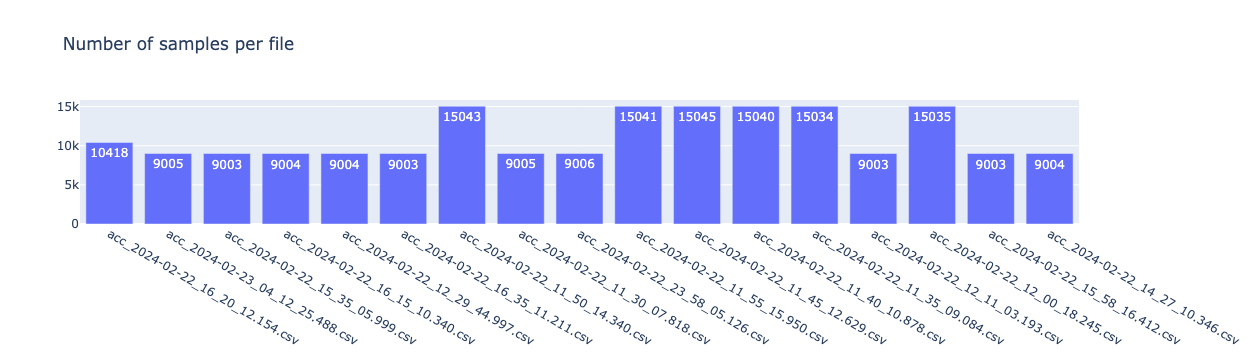

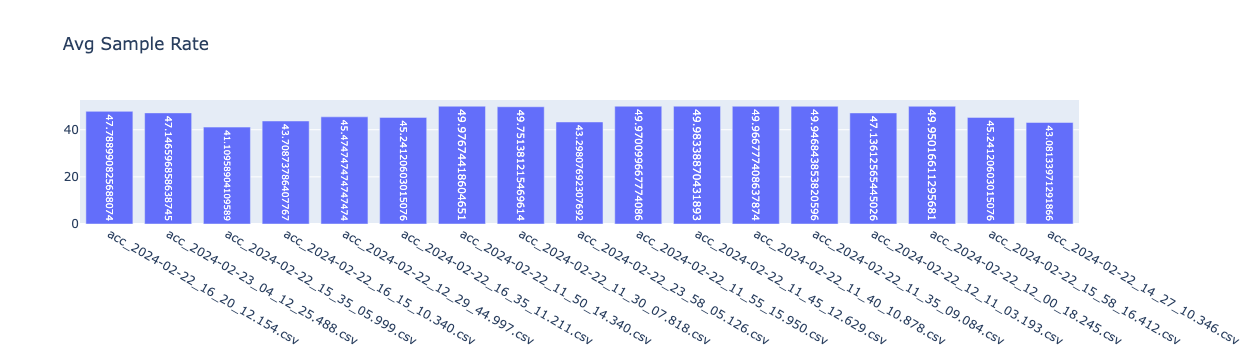

Number of files containing 'acc': 17


In [30]:
file_count_acc,num_values_in_file,df_list_acc = file_count(directory_path, "acc")

In [34]:

df_list_acc_ordered = df_list_acc.sort_values(by='formatted_timestamp', ascending=True)
df_list_acc_ordered

,X,Y,Z,event.timestamp,Timestamp,formatted_timestamp
5463,-0.361524,2.657564,-9.572019,317304506371453,2024-02-23 00:00:00.422,00:00:00
5468,-0.368707,2.561796,-9.540894,317304606072381,2024-02-23 00:00:00.522,00:00:00
5469,-0.313640,2.616862,-9.576807,317304625969841,2024-02-23 00:00:00.541,00:00:00
5470,-0.385466,2.528277,-9.500193,317304645928338,2024-02-23 00:00:00.561,00:00:00
5471,-0.330400,2.609680,-9.512163,317304665825798,2024-02-23 00:00:00.582,00:00:00
...,...,...,...,...,...,...
5432,-0.330400,2.643199,-9.519346,317299367150261,2024-02-22 23:59:55.283,23:59:55
5433,-0.375890,2.585738,-9.567230,317299387169793,2024-02-22 23:59:55.302,23:59:55
5434,-0.347159,2.537854,-9.524135,317299407097771,2024-02-22 23:59:55.322,23:59:55
5428,-0.311246,2.609680,-9.595961,317294323113396,2024-02-22 23:59:55.258,23:59:55


file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_10_11_13.824.csv
Number of samples per file:  9005
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_11_05_33.317.csv
Number of samples per file:  9393
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_11_10_34.573.csv
Number of samples per file:  15033
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_11_15_36.471.csv
Number of samples per file:  15033
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024

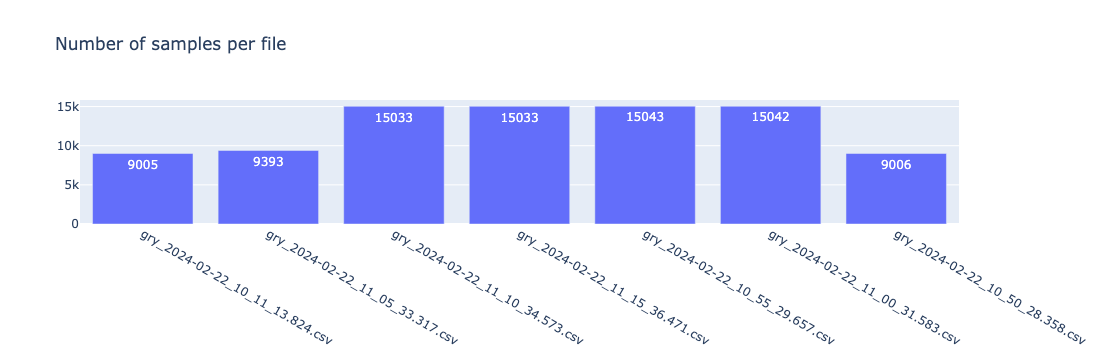

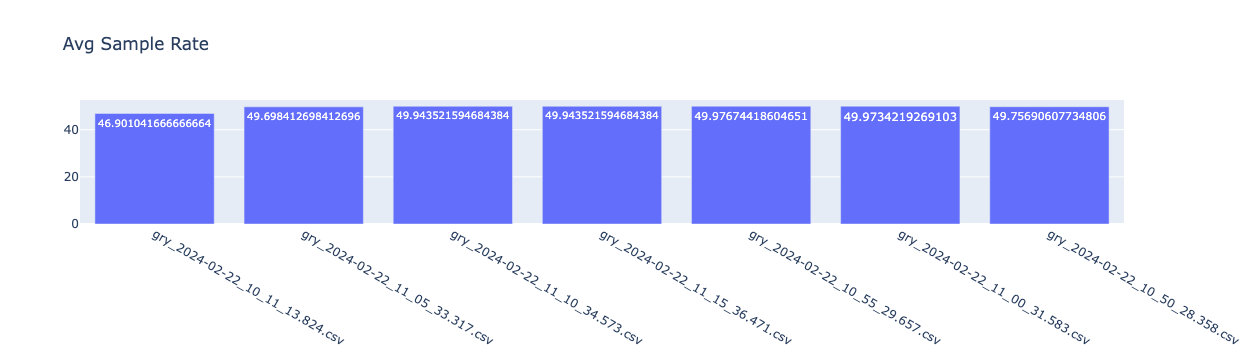

Number of files containing 'gry': 7


In [25]:
file_count_gry = file_count(directory_path, "gry")

file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_11_15_36.4712024-02-22_11_15_36.471.csv
Number of samples per file:  1690
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_11_10_34.5732024-02-22_11_10_34.573.csv
Number of samples per file:  1388
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_11_00_31.5832024-02-22_11_00_31.583.csv
Number of samples per file:  784
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_10_50_28.3582024-02-22_10_50_28.358.csv
Number of samples per file:  180
file_path =  /Users/shehjarsad

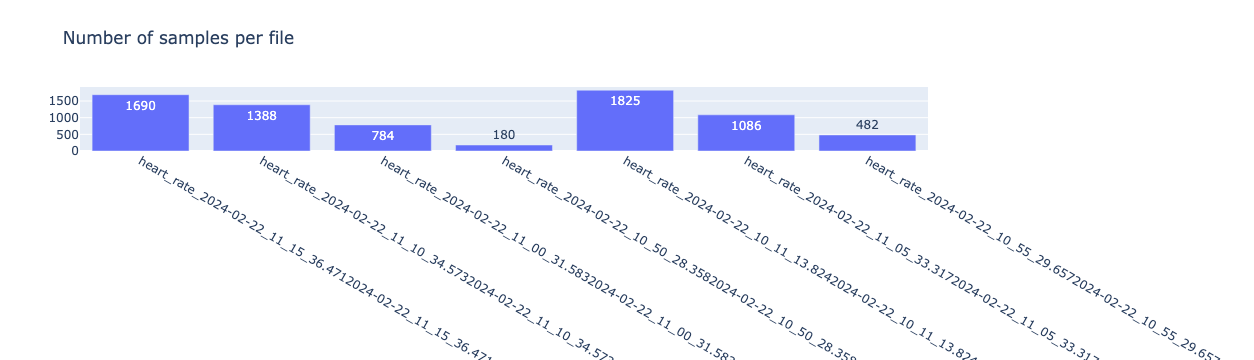

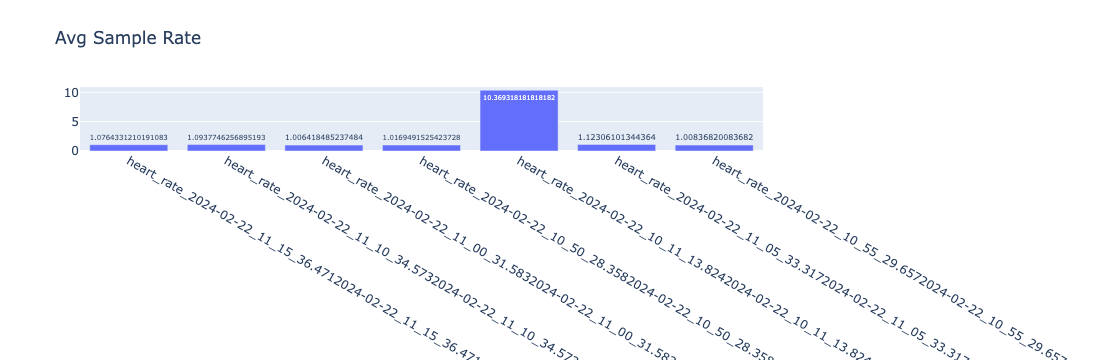

Number of files containing 'heart_rate': 7


In [26]:
file_count_hr = file_count(directory_path, "heart_rate")

In [24]:
df = pd.read_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-05-2024/acc_2024-02-05_14_41_47.820.csv")


In [25]:
df.columns

Index(['X', 'Y', 'Z', 'event.timestamp', 'Timestamp'], dtype='object')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

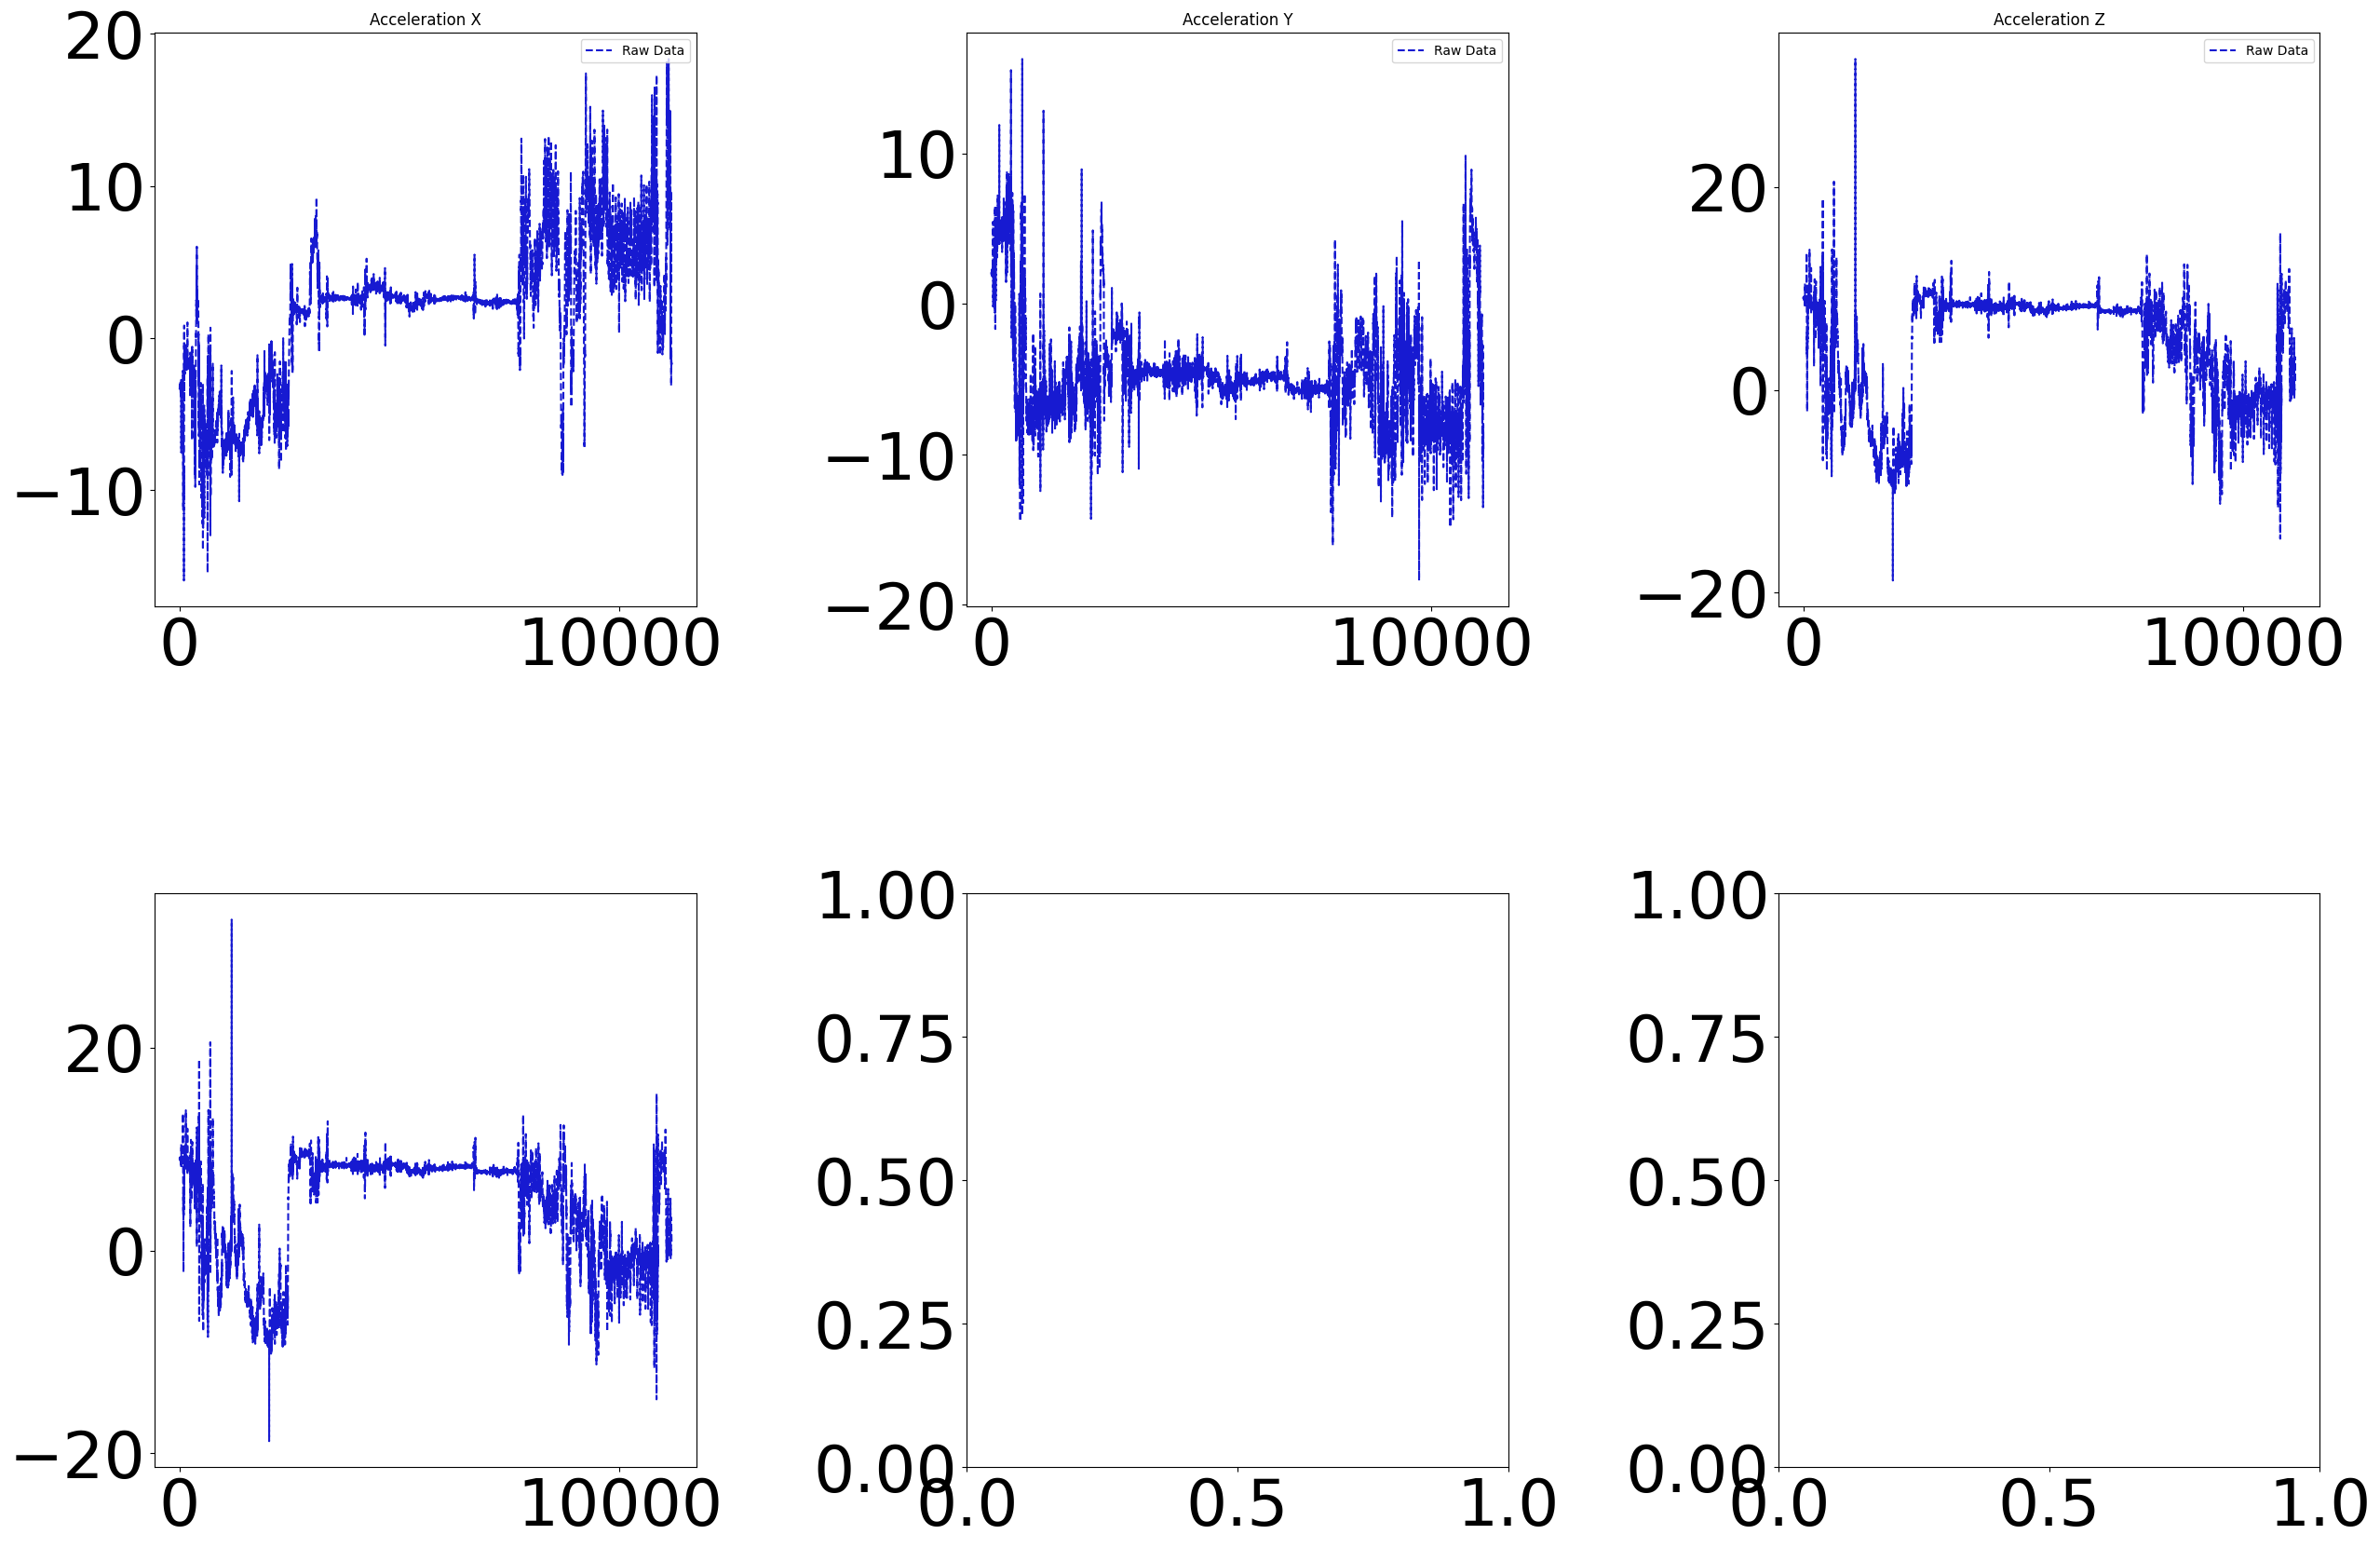

In [26]:
filtering_plots(df)